# TestFile1

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# get data
eeg_data = np.genfromtxt("data/TestFile1.txt").astype(np.float32)
eeg_data.shape

(12, 165760)

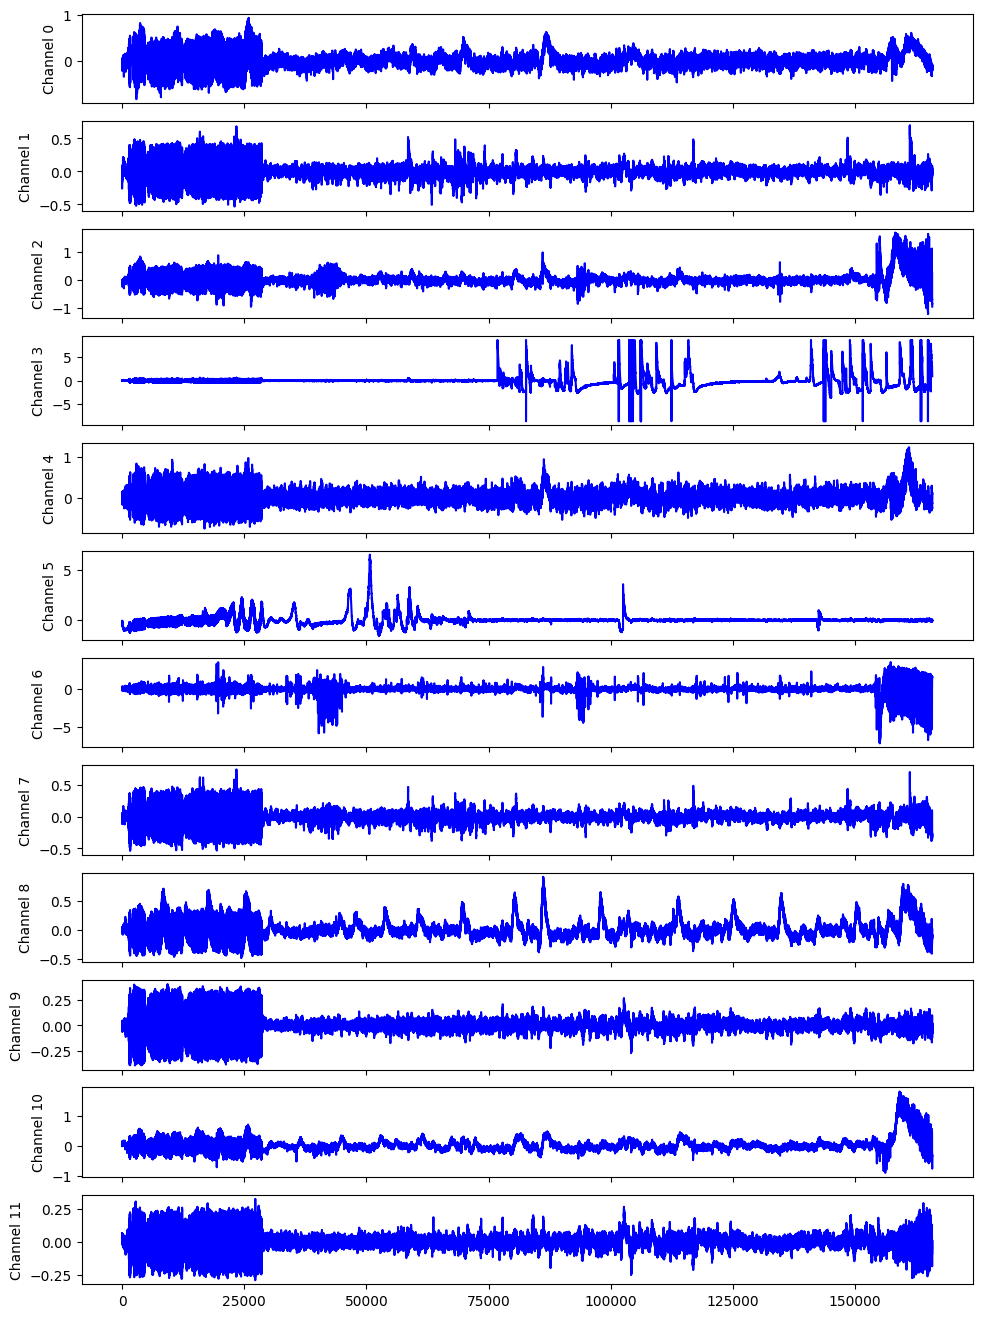

In [44]:
# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

In [45]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

# Change Point 1

In [46]:
from importlib import reload
import CPD.warm

reload(CPD.warm)

# warm up for 200 seconds and create saliency maps (10 s)
fftwarm = CPD.warm.ARPWarm(channels, n0=20, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [47]:
import CPD.benchmark
reload(CPD.benchmark)

cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _ = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 20
STEP 21
STEP 22
channel_5 rejection incremented 1
STEP 23
channel_5 rejection incremented 2
STEP 24
channel_5 rejection incremented 3
STEP 25
channel_5 rejection incremented 4
channel_2 rejection incremented 1
STEP 26
channel_10 rejection incremented 1
channel_5 rejection incremented 5
channel_2 rejection incremented 2
STEP 27
channel_10 rejection incremented 2
channel_5 rejection incremented 6
channel_2 rejection incremented 3
STEP 28
channel_10 rejection incremented 3
channel_5 rejection incremented 7
channel_2 rejection incremented 4
channel_0 rejection incremented 1
STEP 29
channel_10 rejection incremented 4
channel_5 rejection incremented 8
channel_2 rejection incremented 5
channel_0 rejection incremented 2
STEP 30
channel_10 rejection incremented 5
channel_5 rejection incremented 9
channel_2 resetting rejection
channel_0 resetting rejection
STEP 31
channel_10 rejection incremented 6
channel_5 rejection incremented 10
channel_2 rejection incremented 1
channel_0 rejection i

In [48]:
change_points

{'channel_5': 4224, 'channel_10': 61824}

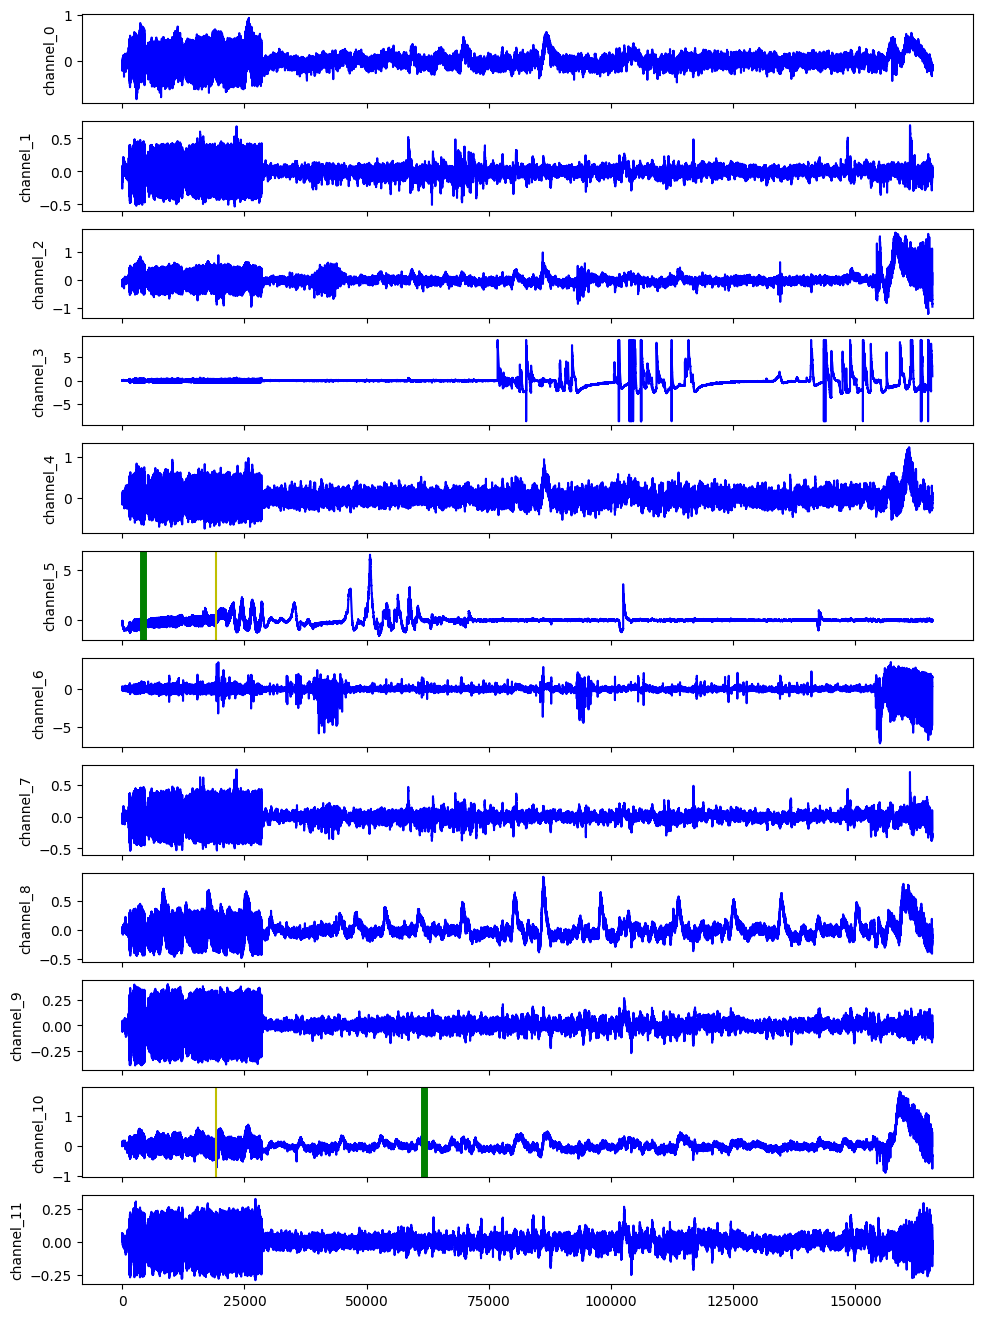

In [49]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 150 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [50]:
# get data past detected change-point `t=82176`

channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [51]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.ARPWarm(channels, n0=20, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [52]:
cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _  = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")
# AIMING FOR ...

STEP 20
channel_0 rejection incremented 1
STEP 21
channel_5 rejection incremented 1
channel_0 rejection incremented 2
STEP 22
channel_5 rejection incremented 2
channel_0 rejection incremented 3
STEP 23
channel_5 rejection incremented 3
channel_0 rejection incremented 4
STEP 24
channel_5 rejection incremented 4
channel_0 rejection incremented 5
STEP 25
channel_10 rejection incremented 1
channel_5 rejection incremented 5
channel_1 rejection incremented 1
channel_0 rejection incremented 6
STEP 26
channel_10 rejection incremented 2
channel_5 rejection incremented 6
channel_1 resetting rejection
channel_0 rejection incremented 7
STEP 27
channel_10 rejection incremented 3
channel_5 rejection incremented 7
channel_0 rejection incremented 8
STEP 28
channel_10 rejection incremented 4
channel_5 rejection incremented 8
channel_8 rejection incremented 1
channel_0 rejection incremented 9
STEP 29
channel_10 rejection incremented 5
channel_5 rejection incremented 9
channel_8 resetting rejection
chann

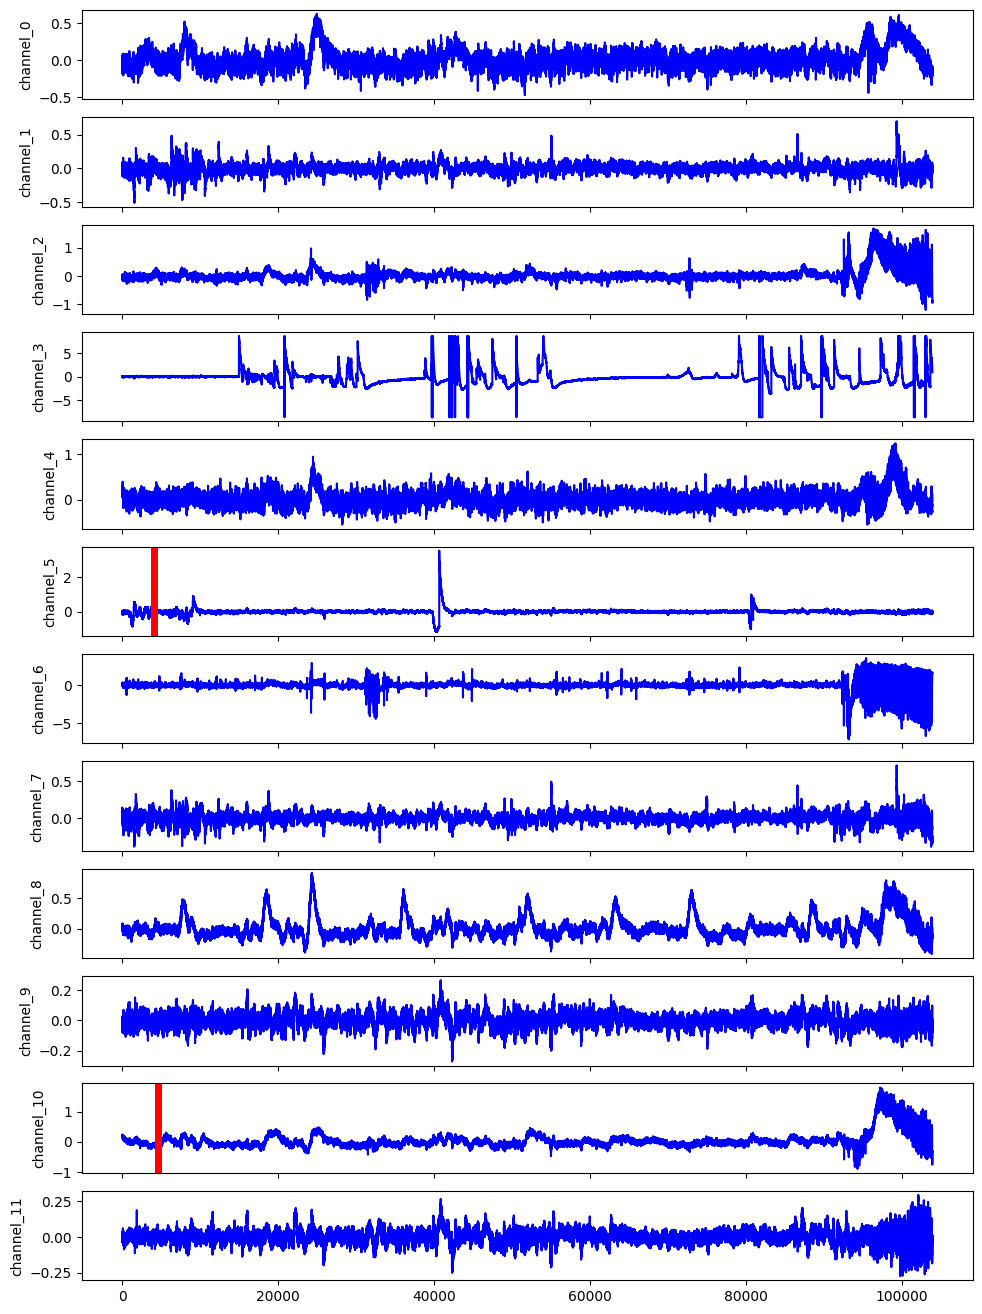

In [53]:
time = [i for i in range(channels["channel_0"].shape[0])]

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)

    axs[c].set_ylabel(chan)


# TestFile2

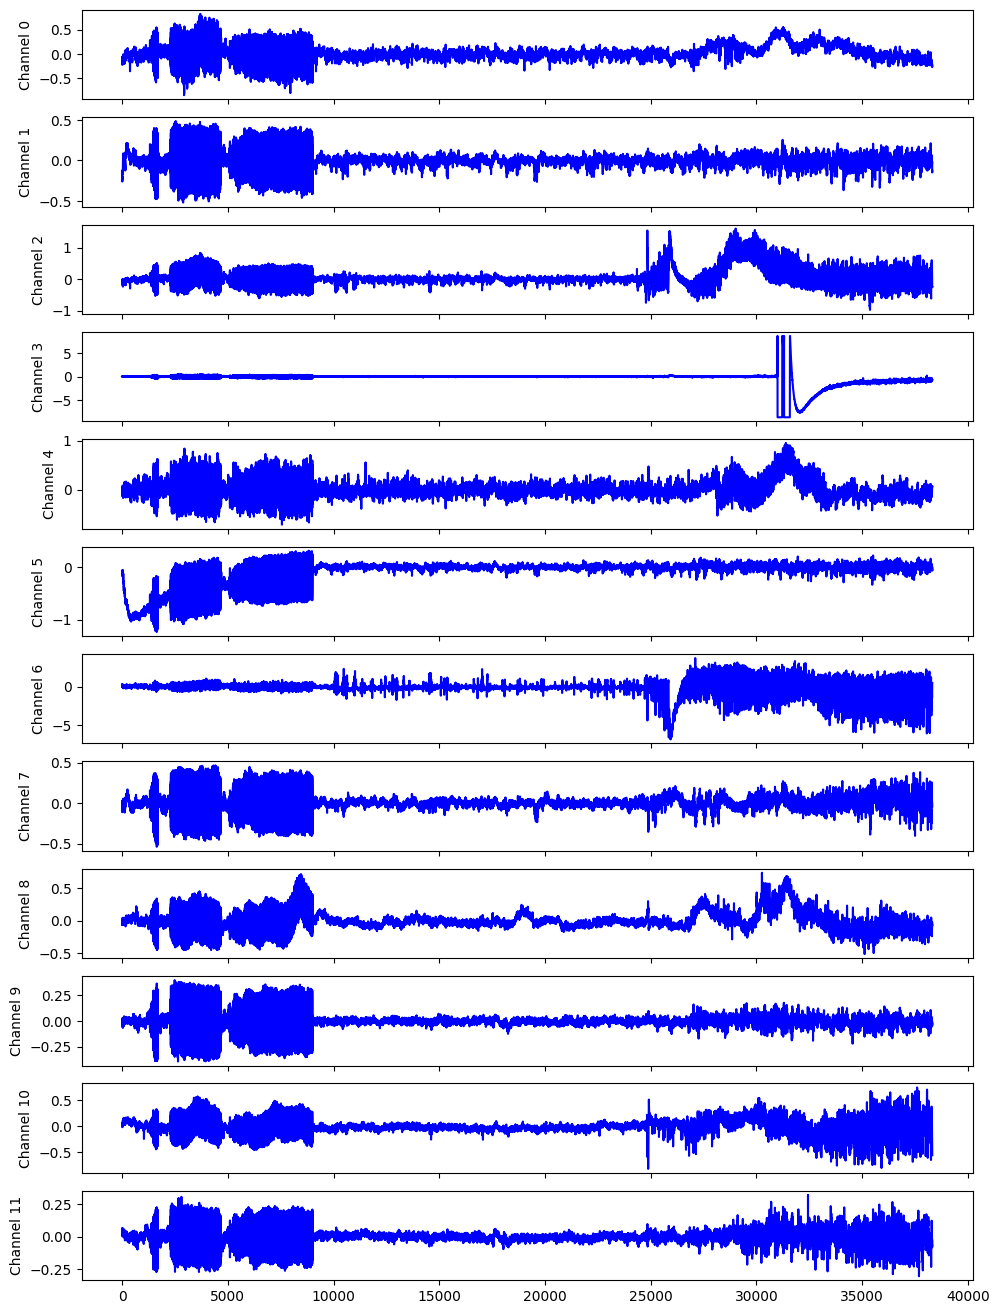

In [69]:
# get data
eeg_data = np.genfromtxt("data/TestFile2.txt").astype(np.float32)

# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

# Change Point 1

In [70]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

from importlib import reload
import CPD.warm

reload(CPD.warm)

# warm up for 50 seconds and create saliency maps (10 s)
fftwarm = CPD.warm.ARPWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [71]:
cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _ = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
STEP 51
STEP 52
STEP 53
channel_5 rejection incremented 1
STEP 54
channel_5 rejection incremented 2
STEP 55
channel_10 rejection incremented 1
channel_5 rejection incremented 3
STEP 56
channel_10 rejection incremented 2
channel_5 rejection incremented 4
STEP 57
channel_10 rejection incremented 3
channel_5 rejection incremented 5
channel_0 rejection incremented 1
STEP 58
channel_10 rejection incremented 4
channel_5 rejection incremented 6
channel_0 resetting rejection
STEP 59
channel_10 resetting rejection
channel_5 rejection incremented 7
STEP 60
channel_5 rejection incremented 8
channel_0 rejection incremented 1
STEP 61
channel_5 rejection incremented 9
channel_0 resetting rejection
STEP 62
channel_5 rejection incremented 10
channel_0 rejection incremented 1
STEP 63
channel_5 rejection incremented 11
channel_8 rejection incremented 1
channel_0 resetting rejection
STEP 64
channel_5 rejection incremented 12
channel_5 detected change point! Halting.
channel_8 rejection incremente

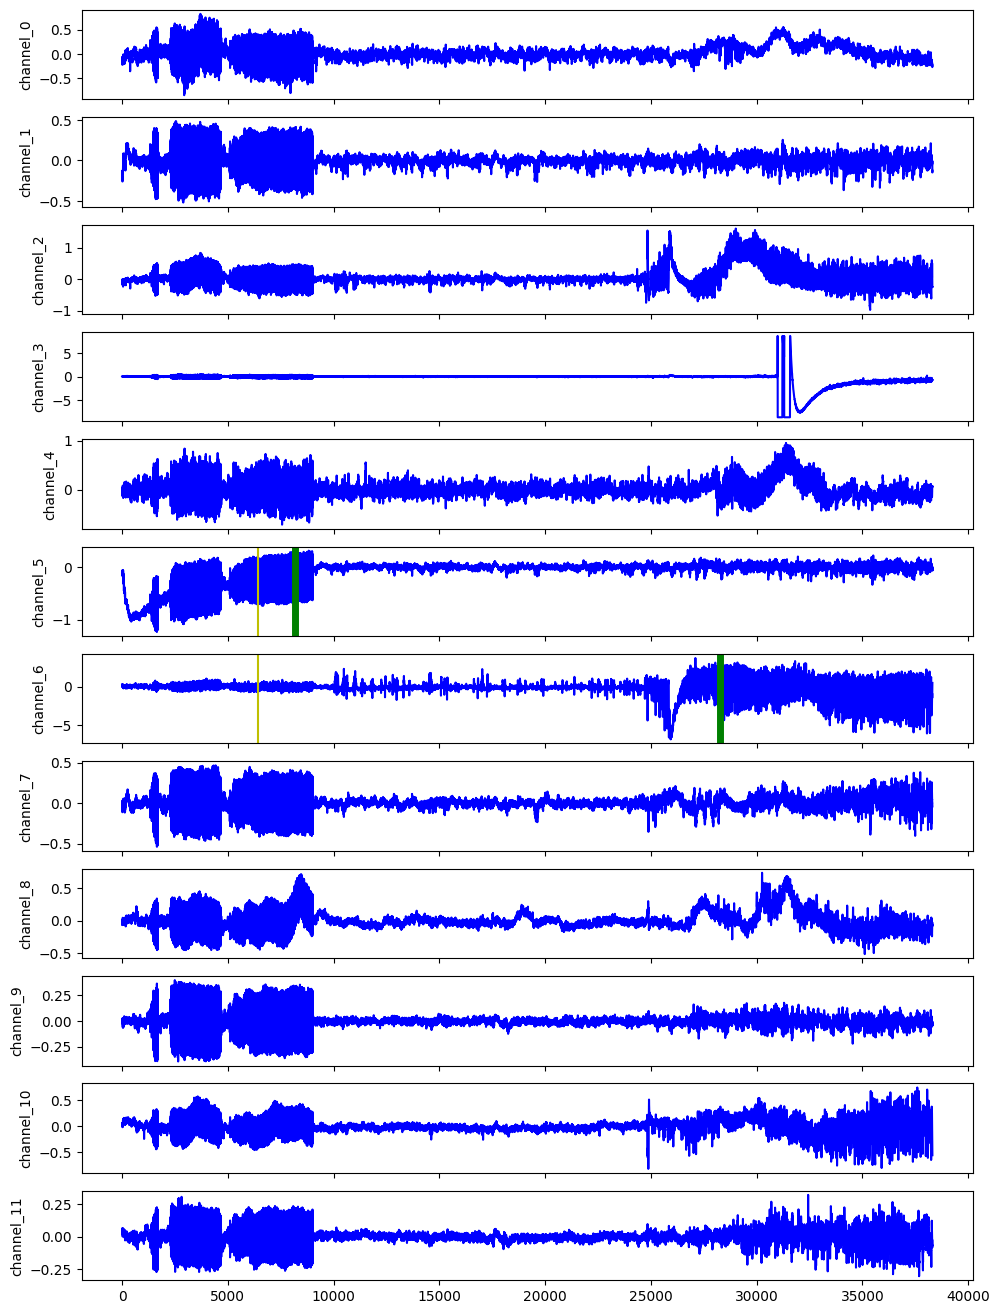

In [72]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 50 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [74]:
# get data past detected change-point `t=82176`
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [75]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.ARPWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [77]:
cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _ = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
channel_10 rejection incremented 1
STEP 51
channel_10 resetting rejection
STEP 52
STEP 53
channel_10 rejection incremented 1
channel_0 rejection incremented 1
STEP 54
channel_10 resetting rejection
channel_0 resetting rejection
STEP 55
channel_0 rejection incremented 1
STEP 56
channel_4 rejection incremented 1
channel_0 rejection incremented 2
STEP 57
channel_4 rejection incremented 2
channel_0 rejection incremented 3
STEP 58
channel_4 resetting rejection
channel_0 rejection incremented 4
STEP 59
channel_0 rejection incremented 5
STEP 60
channel_0 rejection incremented 6
STEP 61
channel_4 rejection incremented 1
channel_0 rejection incremented 7
STEP 62
channel_4 rejection incremented 2
channel_0 rejection incremented 8
STEP 63
channel_4 rejection incremented 3
channel_0 rejection incremented 9
STEP 64
channel_4 resetting rejection
channel_0 rejection incremented 10
STEP 65
channel_0 rejection incremented 11
STEP 66
channel_0 rejection incremented 12
channel_0 detected change p

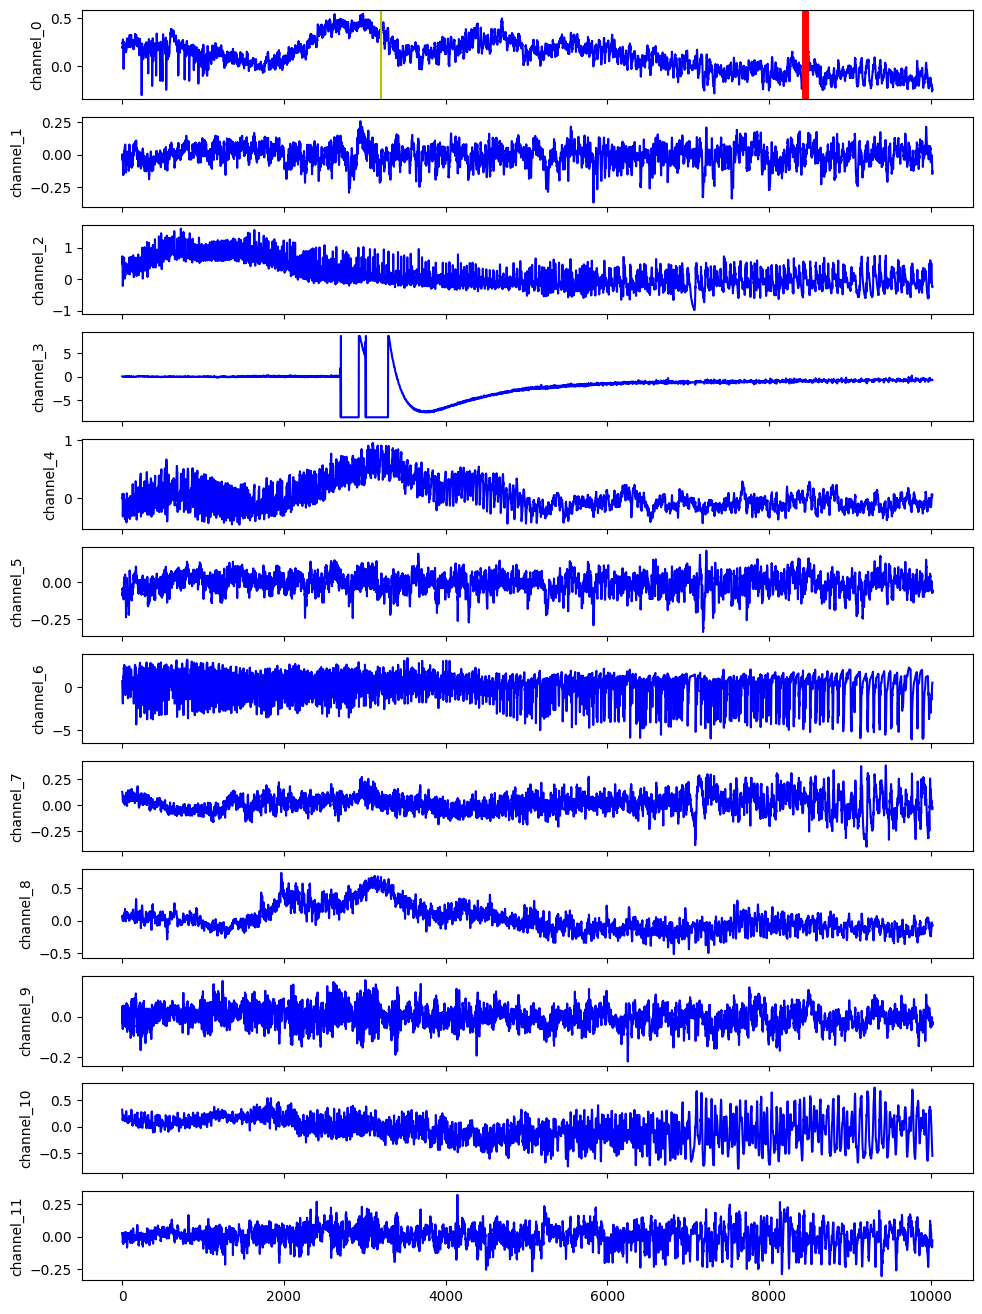

In [78]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 25 * 128

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)


# TestFile3

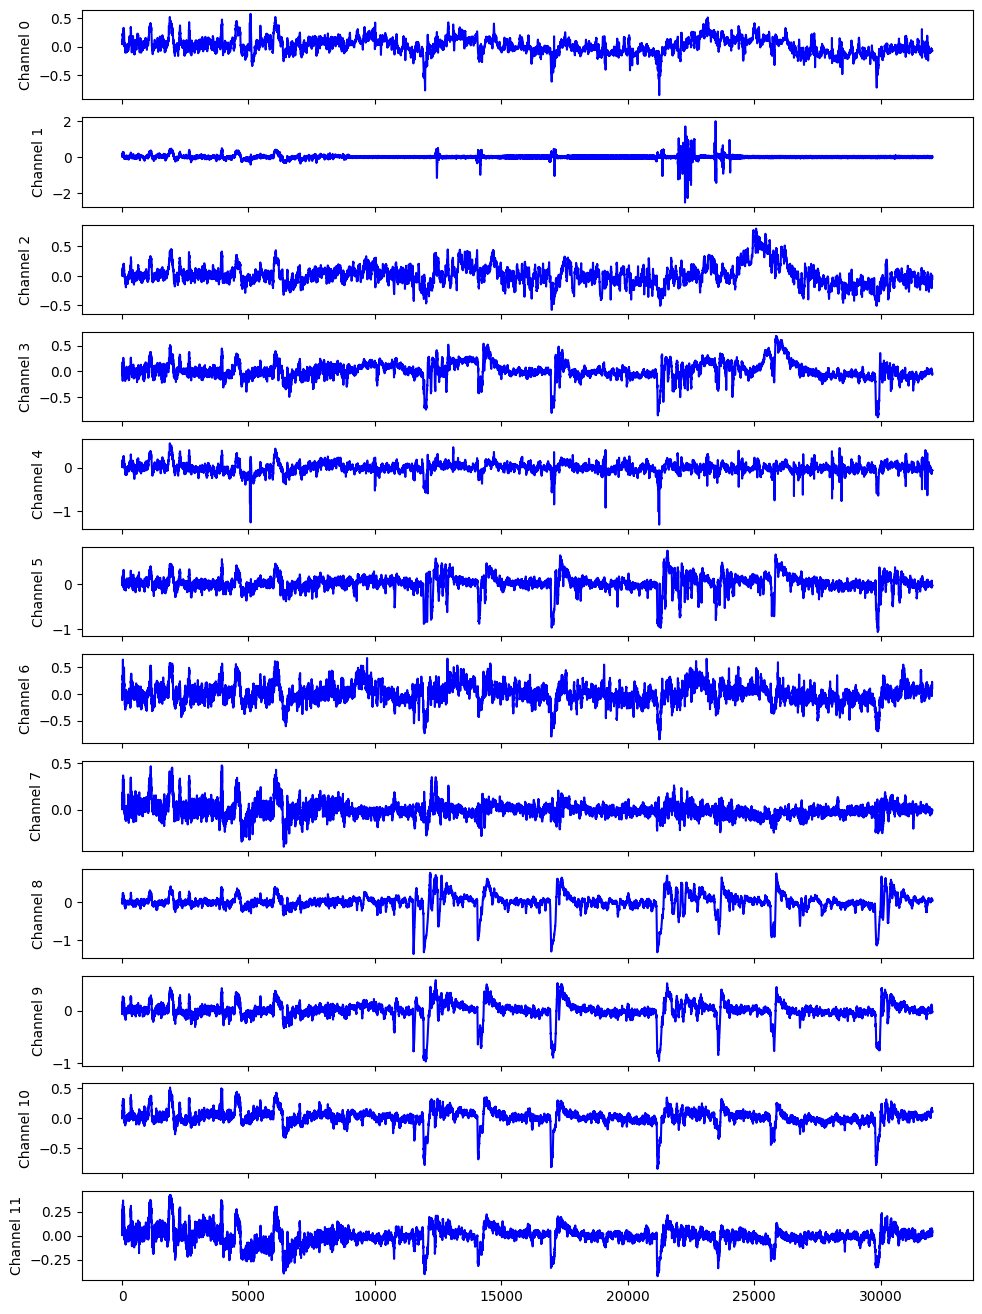

In [79]:
# get data
eeg_data = np.genfromtxt("data/TestFile3.txt").astype(np.float32)

# visualize for good measure
time = [i for i in range(eeg_data.shape[1])]

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    axs[c].plot(time, eeg_data[c], 'b')
    axs[c].set_ylabel(f"Channel {c}")

# Change Point 1

In [80]:
# put arrays in dictionary for labels
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i]

# warm up for 50 seconds and create saliency maps 
fftwarm = CPD.warm.ARPWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [81]:

cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _ = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
channel_10 rejection incremented 1
channel_8 rejection incremented 1
channel_1 rejection incremented 1
channel_2 rejection incremented 1
channel_6 rejection incremented 1
channel_3 rejection incremented 1
STEP 51
channel_9 rejection incremented 1
channel_10 rejection incremented 2
channel_5 rejection incremented 1
channel_8 rejection incremented 2
channel_1 rejection incremented 2
channel_2 rejection incremented 2
channel_0 rejection incremented 1
channel_6 rejection incremented 2
channel_3 rejection incremented 2
STEP 52
channel_9 resetting rejection
channel_10 rejection incremented 3
channel_5 resetting rejection
channel_8 rejection incremented 3
channel_1 resetting rejection
channel_2 rejection incremented 3
channel_0 resetting rejection
channel_6 resetting rejection
channel_3 rejection incremented 3
STEP 53
channel_10 rejection incremented 4
channel_8 rejection incremented 4
channel_2 rejection incremented 4
channel_3 resetting rejection
STEP 54
channel_10 resetting rejecti

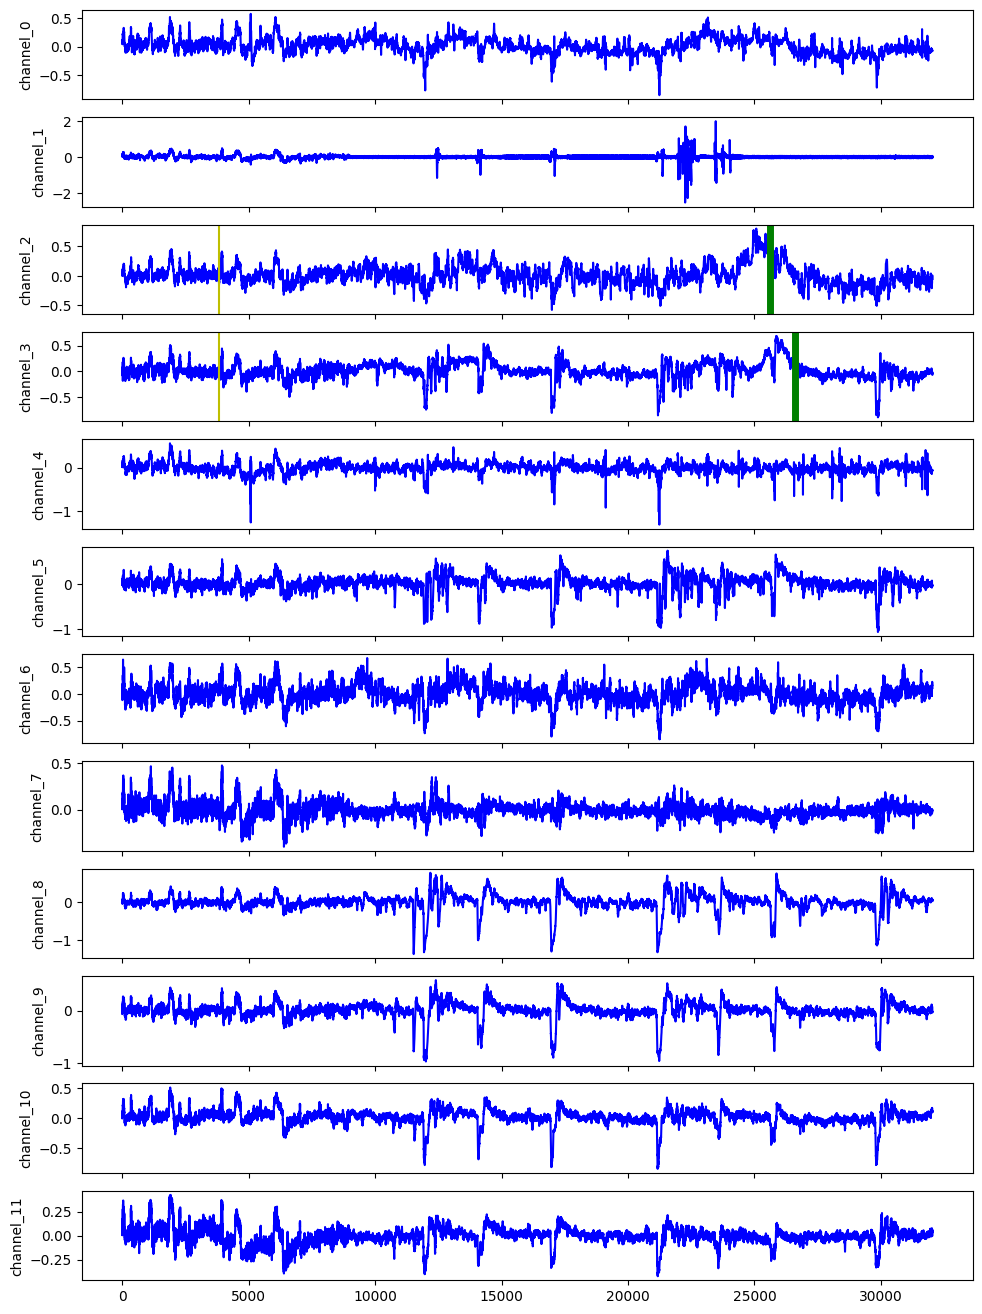

In [82]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 30 * 128

fig, axs = plt.subplots(eeg_data.shape[0], 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')
    
    if chan in change_points:
        chan_cpt = change_points[chan]
        axs[c].axvline(x=chan_cpt, c='g', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)

# Change Point 2

In [83]:
# get data past detected change-point
channels = {}
for i in range(len(eeg_data)):
    channels[f"channel_{i}"] = eeg_data[i][cpt:]

In [84]:
# warm up for 200 seconds and create saliency maps
fftwarm = CPD.warm.ARPWarm(channels, n0=50, chunks=4)
fftwarm.warmup()

['channel_0', 'channel_1', 'channel_2']
['channel_3', 'channel_4', 'channel_5']
['channel_6', 'channel_7', 'channel_8']
['channel_9', 'channel_10', 'channel_11']


In [86]:
cpd = CPD.benchmark.Online(fftwarm, k=2, M=11)

change_points, _ = cpd.run()

cpt = max(change_points.values())

print(f"change point detected at t={cpt}")

STEP 50
Past!
No more data! Stopped at step 50


ValueError: max() arg is an empty sequence

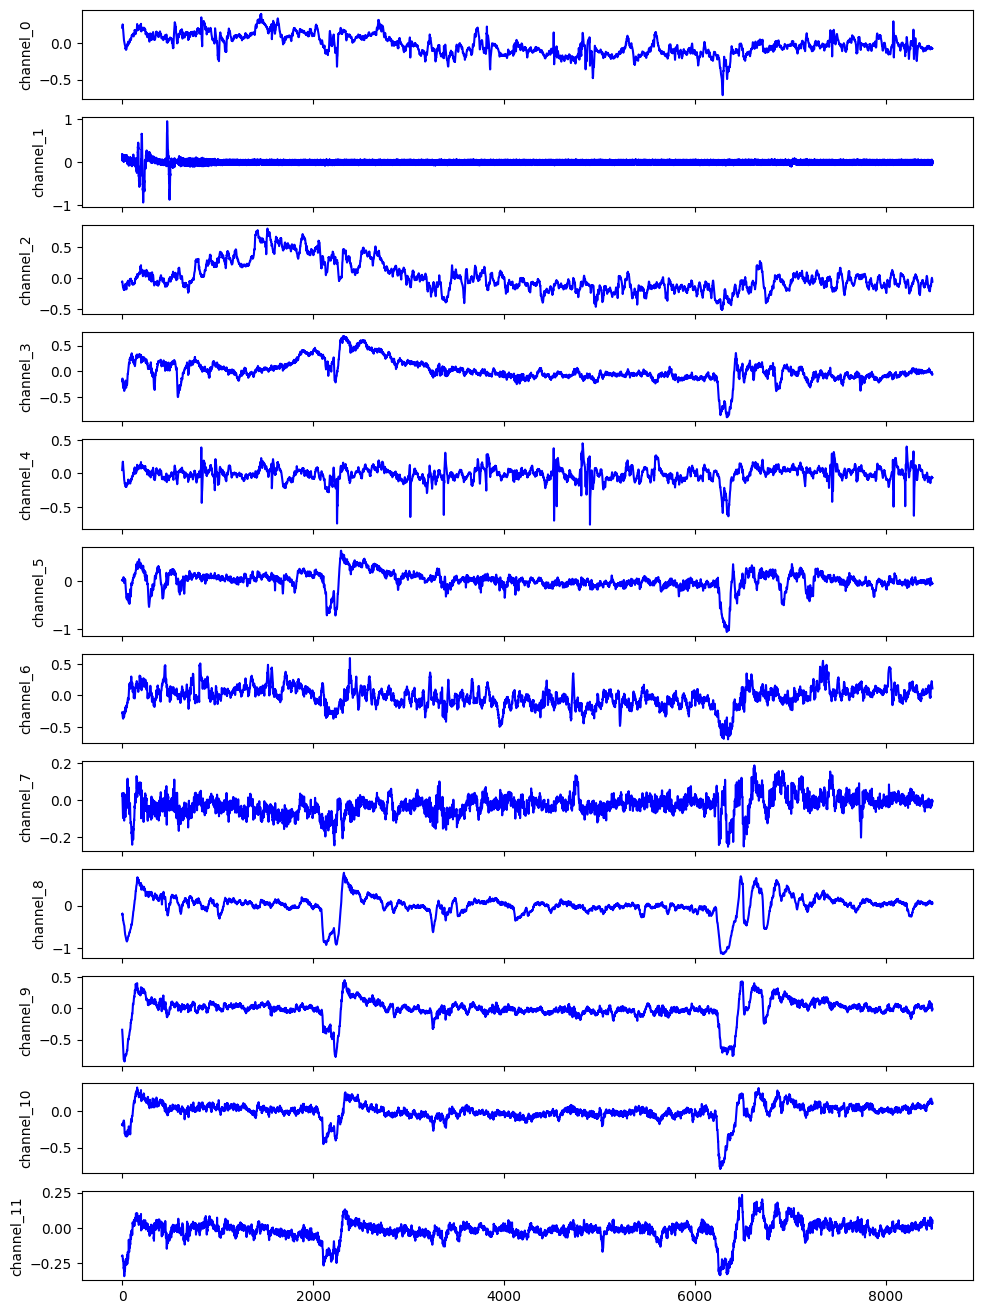

In [ ]:
time = [i for i in range(channels["channel_0"].shape[0])]
warmup = 25 * 128

fig, axs = plt.subplots(len(channels), 1, sharex=True)
fig.set_size_inches(11.5, 16.5)

for c in range(eeg_data.shape[0]):
    chan = f"channel_{c}"
    axs[c].plot(time, channels[chan], 'b')

    if chan in change_points:
        next_cpt = change_points[chan]
        axs[c].axvline(x=next_cpt, c='r', linewidth=5)
        axs[c].axvline(x=warmup, c='y')

    axs[c].set_ylabel(chan)
